# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter

from src.utils import init_notebook

In [2]:
init_notebook()

In [3]:
df = pd.read_csv(
    "data/kickstarter_1.csv",
    parse_dates=True,
)

# Kaplan-Meier

<Axes: xlabel='day_succ', ylabel='Count'>

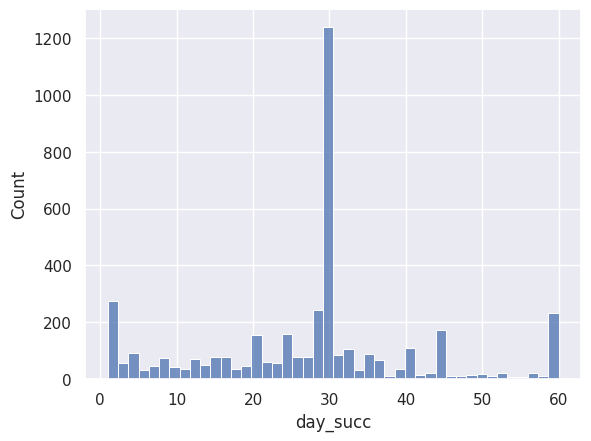

In [4]:
sns.histplot(df["day_succ"])

In [5]:
kmf1 = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf1.fit(event_times, event_observed)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 4175 total observations, 2213 right-censored observations>

Text(0, 0.5, "Probabilité que le projet n'ait pas encore été financé")

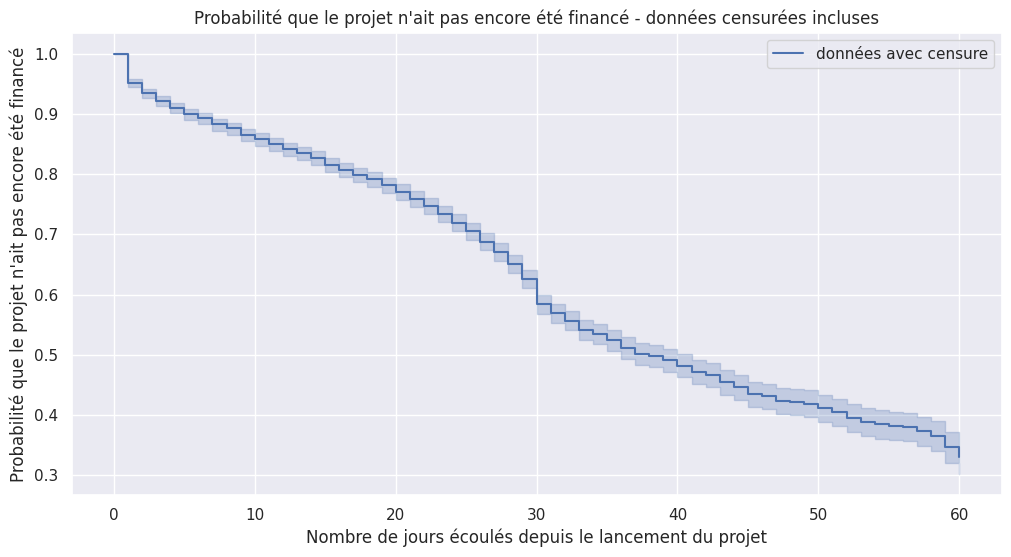

In [6]:
plt.figure(figsize=(12, 6))
kmf1.plot(label="données avec censure")
plt.title(
    "Probabilité que le projet n'ait pas encore été financé"
    " - données censurées incluses"
)
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité que le projet n'ait pas encore été financé")

In [7]:
kmf2 = KaplanMeierFitter()

event_times = df["day_succ"][df["Status"] == 1]
event_observed = df["Status"][df["Status"] == 1]

kmf2.fit(event_times, event_observed)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1962 total observations, 0 right-censored observations>

Text(0, 0.5, 'Probabilité')

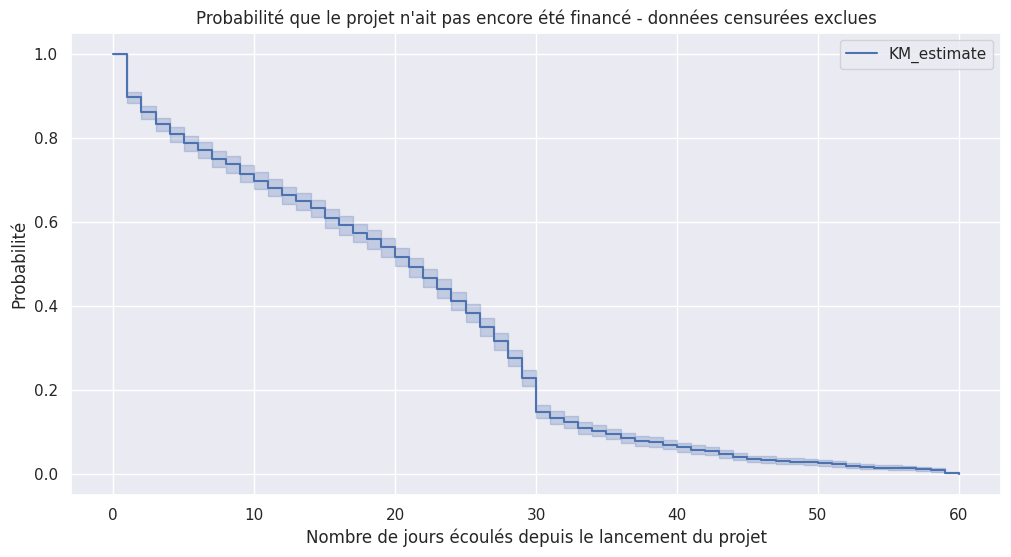

In [8]:
plt.figure(figsize=(12, 6))
kmf2.plot()
plt.title(
    "Probabilité que le projet n'ait pas encore été financé"
    " - données censurées exclues"
)
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

Text(0, 0.5, 'Probabilité')

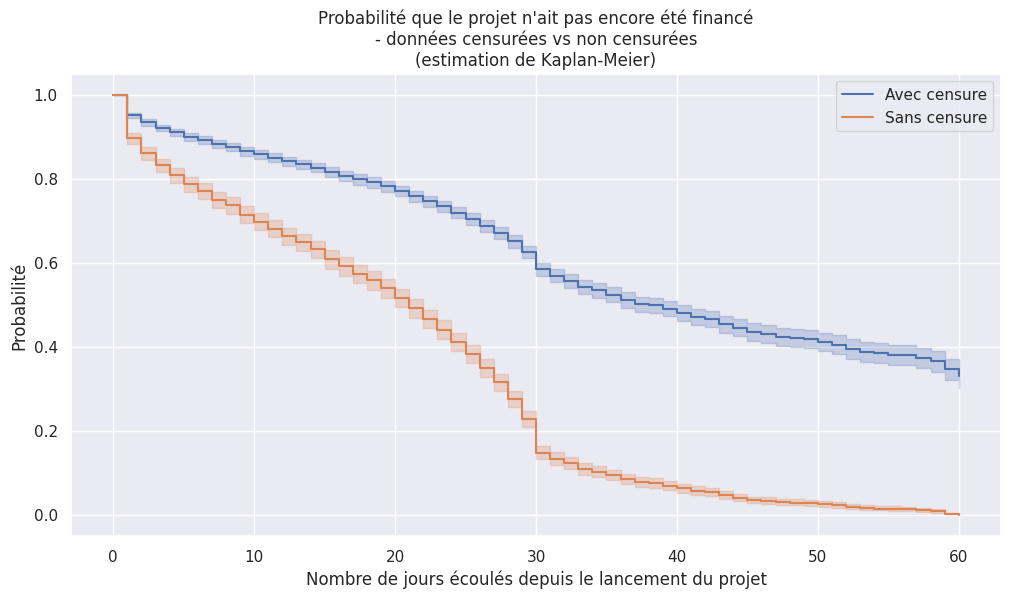

In [9]:
kmf1 = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf1.fit(event_times, event_observed)
plt.figure(figsize=(12, 6))
kmf1.plot_survival_function(label="Avec censure")
kmf2 = KaplanMeierFitter()

event_times = df["day_succ"][df["Status"] == 1]
event_observed = df["Status"][df["Status"] == 1]

kmf2.fit(event_times, event_observed)

kmf2.plot_survival_function(label="Sans censure")
plt.title(
    "Probabilité que le projet n'ait pas encore été financé\n"
    "- données censurées vs non censurées\n"
    "(estimation de Kaplan-Meier)"
)
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

# Kaplan Meier par classe

In [10]:
df_video = df[df["has_video"] == 1].copy()
df_no_video = df[df["has_video"] == 0].copy()

Text(0, 0.5, 'Probabilité')

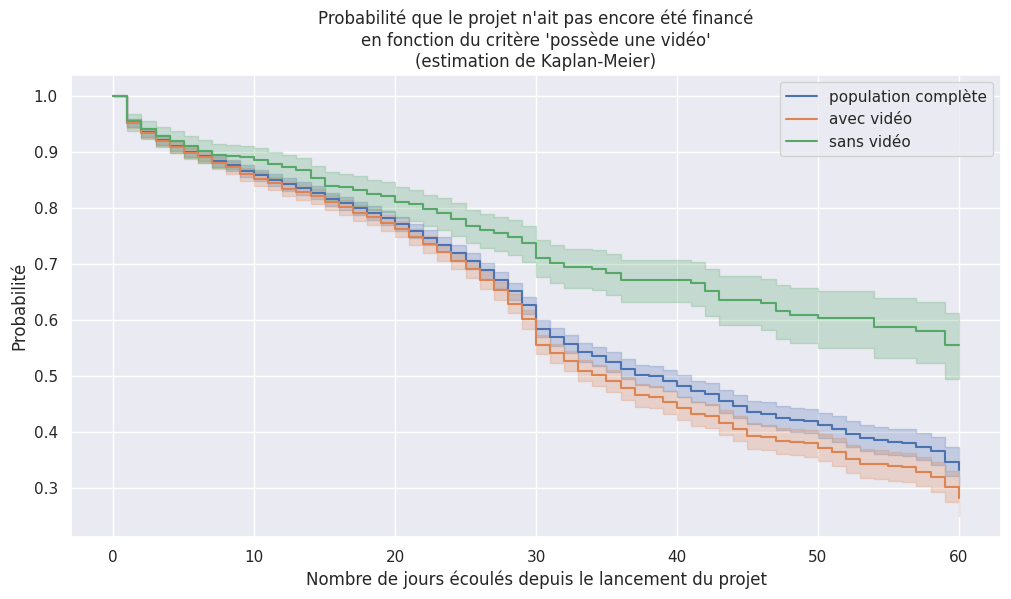

In [11]:
plt.figure(figsize=(12, 6))
kmf = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf.fit(event_times, event_observed)
kmf.plot_survival_function(label="population complète")


event_times = df_video["day_succ"]
event_observed = df_video["Status"]
kmf.fit(event_times, event_observed)

kmf.plot_survival_function(label="avec vidéo")


event_times = df_no_video["day_succ"]
event_observed = df_no_video["Status"]
kmf.fit(event_times, event_observed)

kmf.plot_survival_function(label="sans vidéo")

plt.title(
    "Probabilité que le projet n'ait pas encore été financé\n"
    "en fonction du critère 'possède une vidéo'\n"
    "(estimation de Kaplan-Meier)"
)


plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")